In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Boston Housing dataset from the CSV file
file_path = r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display the first few rows to ensure the data is loaded correctly
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Generate descriptive statistics for the dataset
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 2000x1500 with 0 Axes>

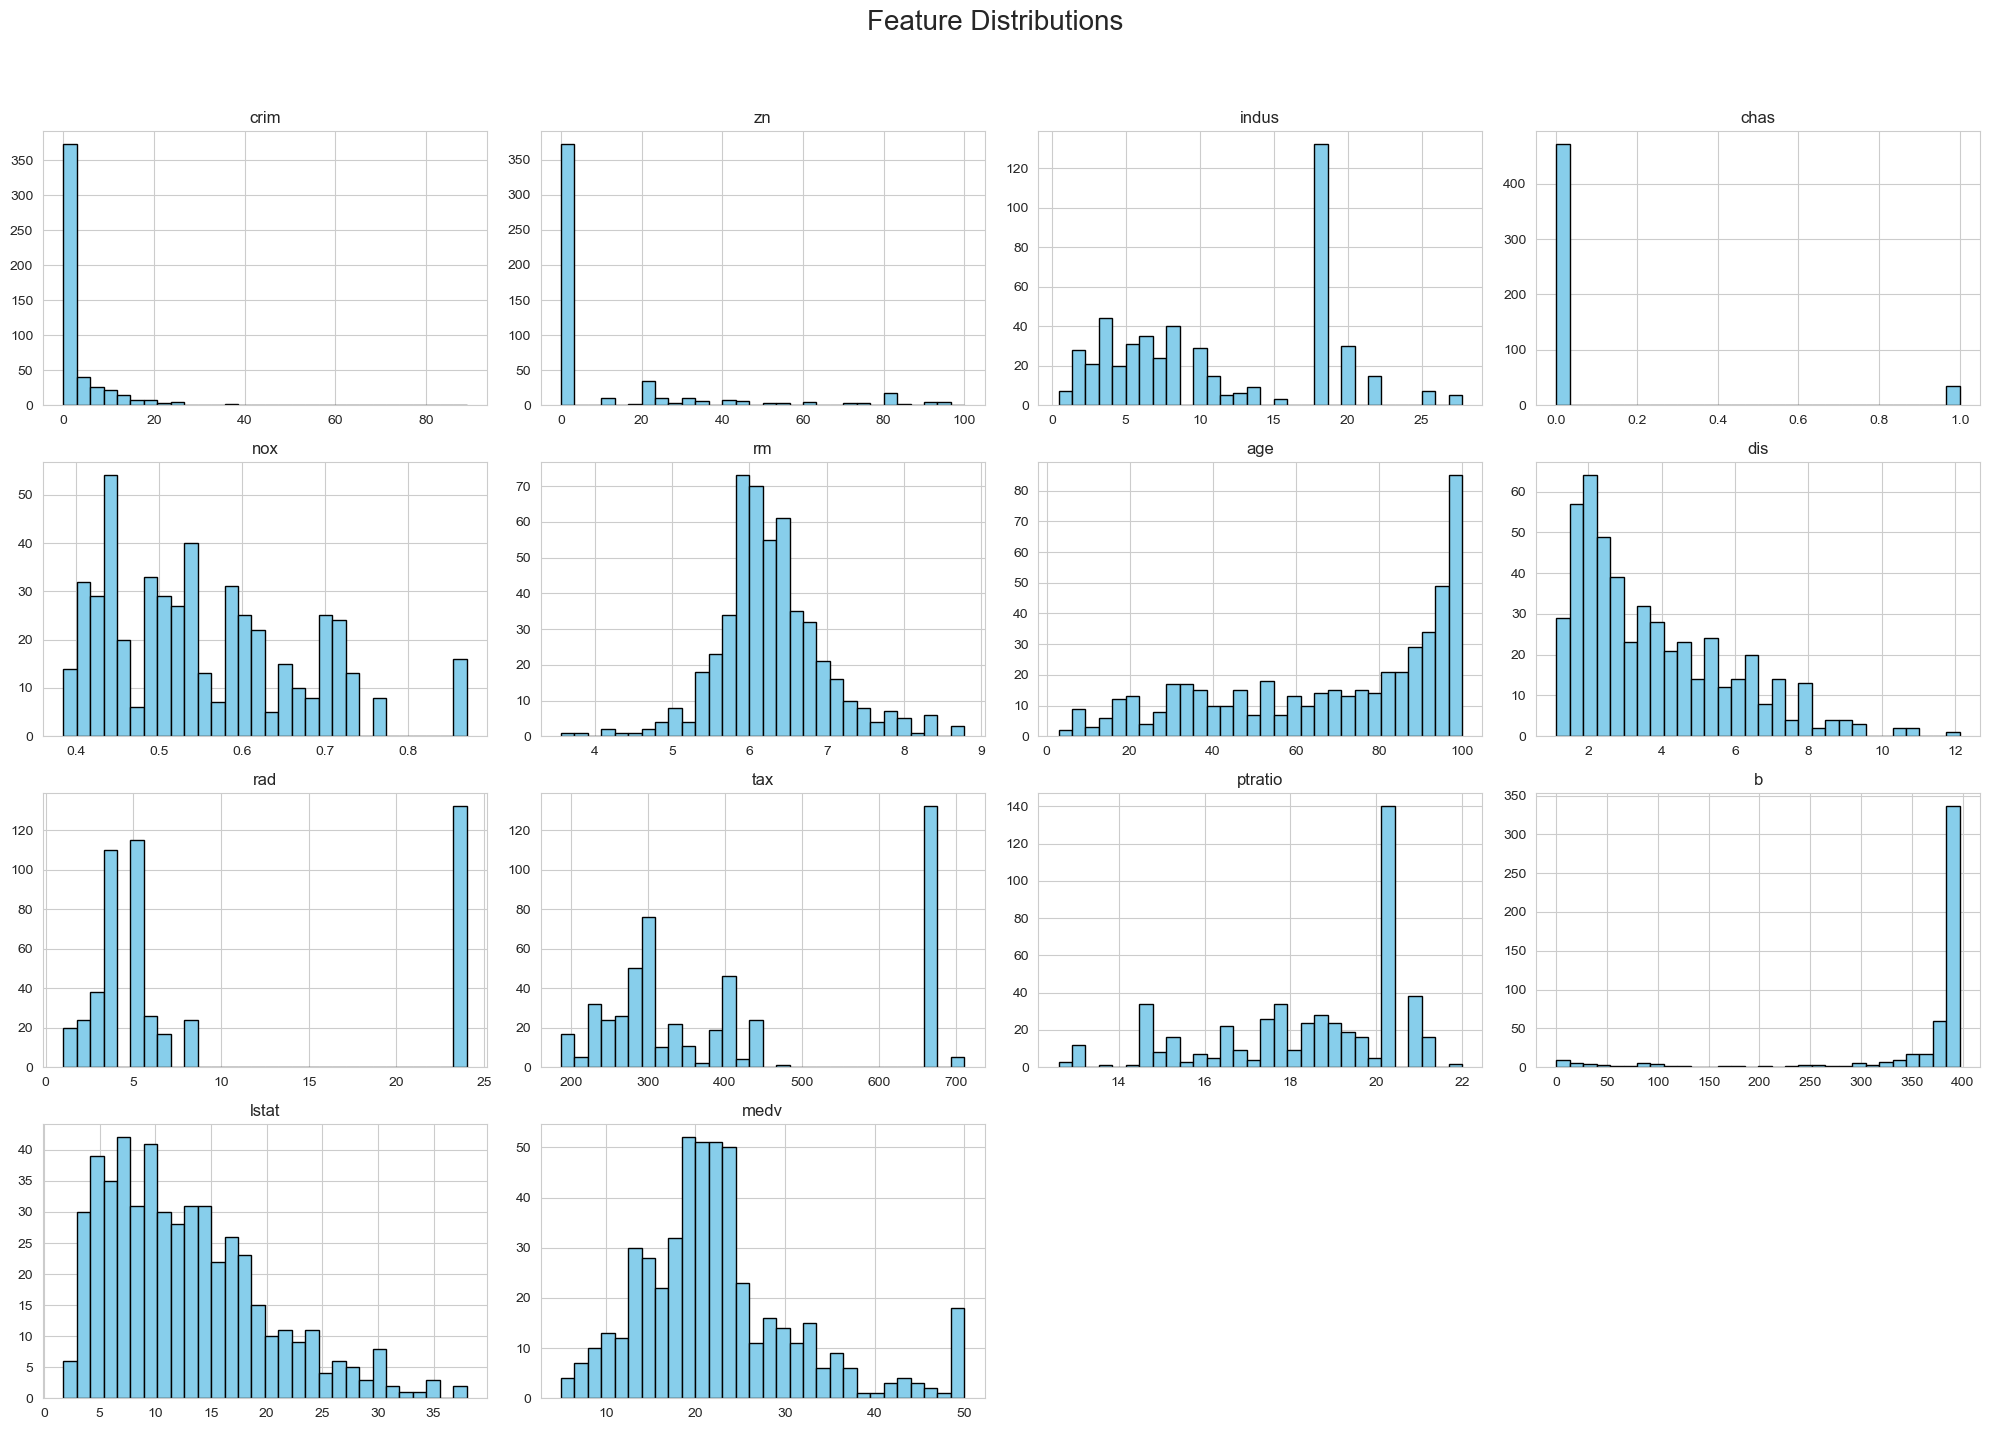

In [4]:
# Set up the aesthetics for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))

# Plot histograms for each feature
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


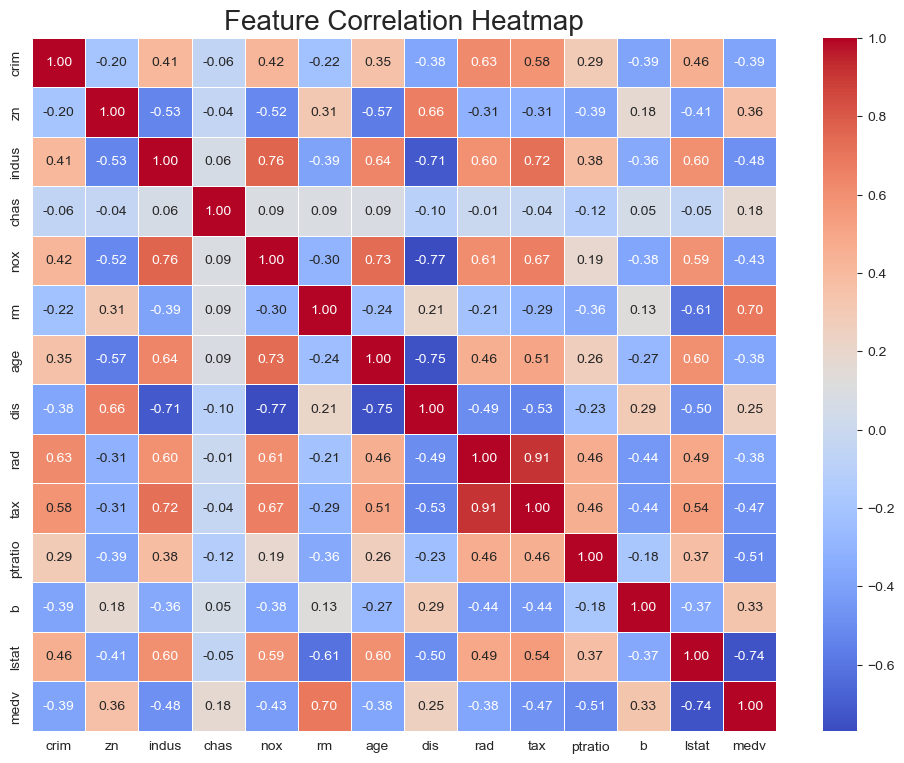

In [5]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")

# Set the title for the plot
plt.title('Feature Correlation Heatmap', fontsize=20)

# Display the heatmap
plt.show()


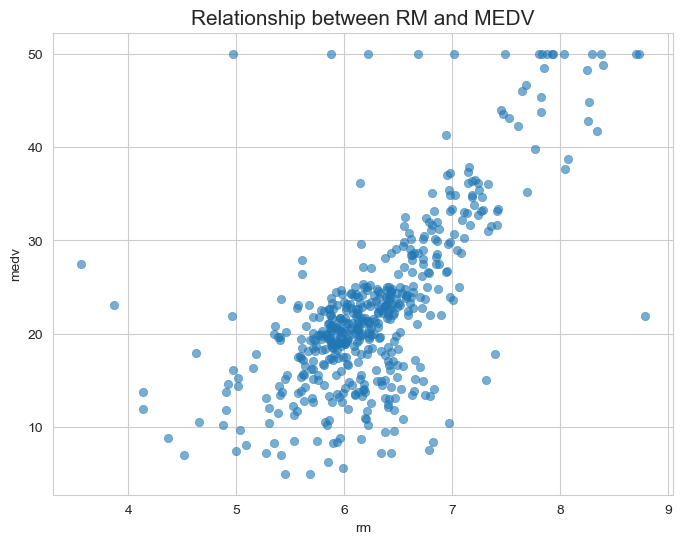

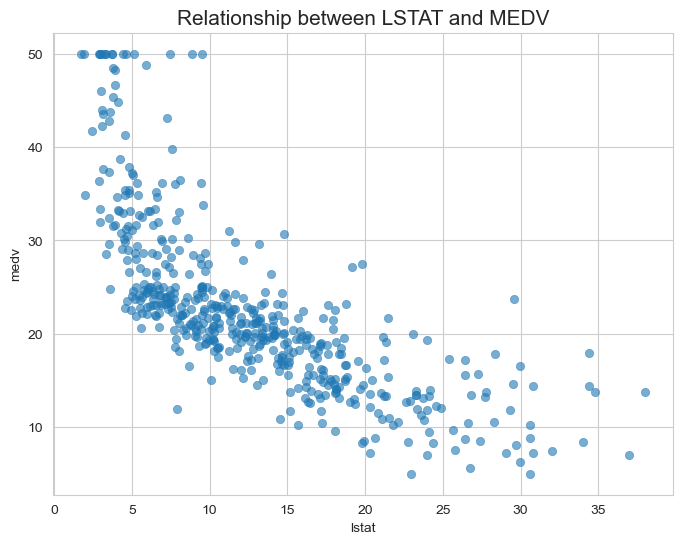

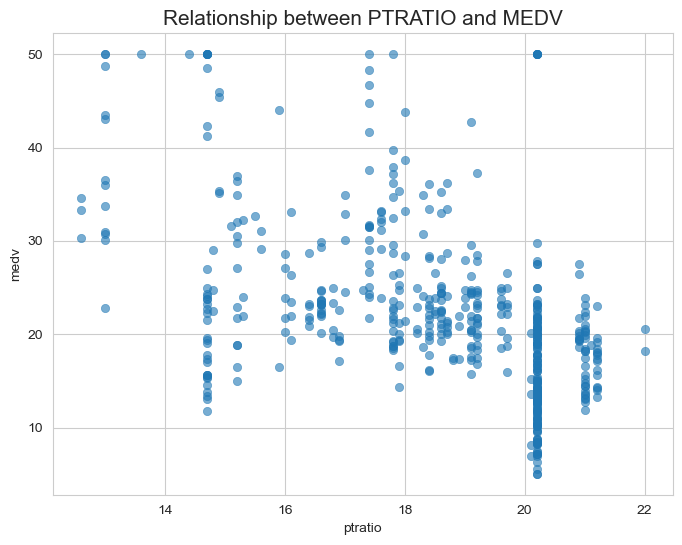

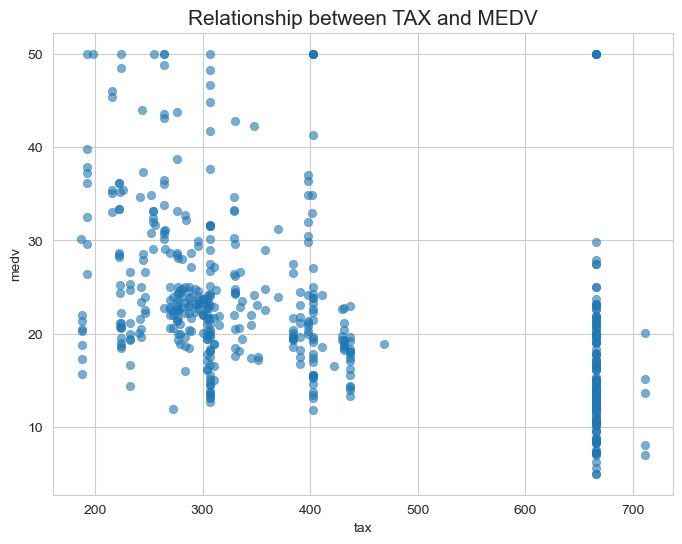

In [6]:
# Set up the aesthetics for the plots
sns.set_style("whitegrid")

# Adjusted list of features to match the dataframe's column names
features = ['rm', 'lstat', 'ptratio', 'tax']

# Create scatter plots
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='medv', alpha=0.6, edgecolor=None)
    plt.title(f'Relationship between {feature.upper()} and MEDV', fontsize=15)
    plt.show()


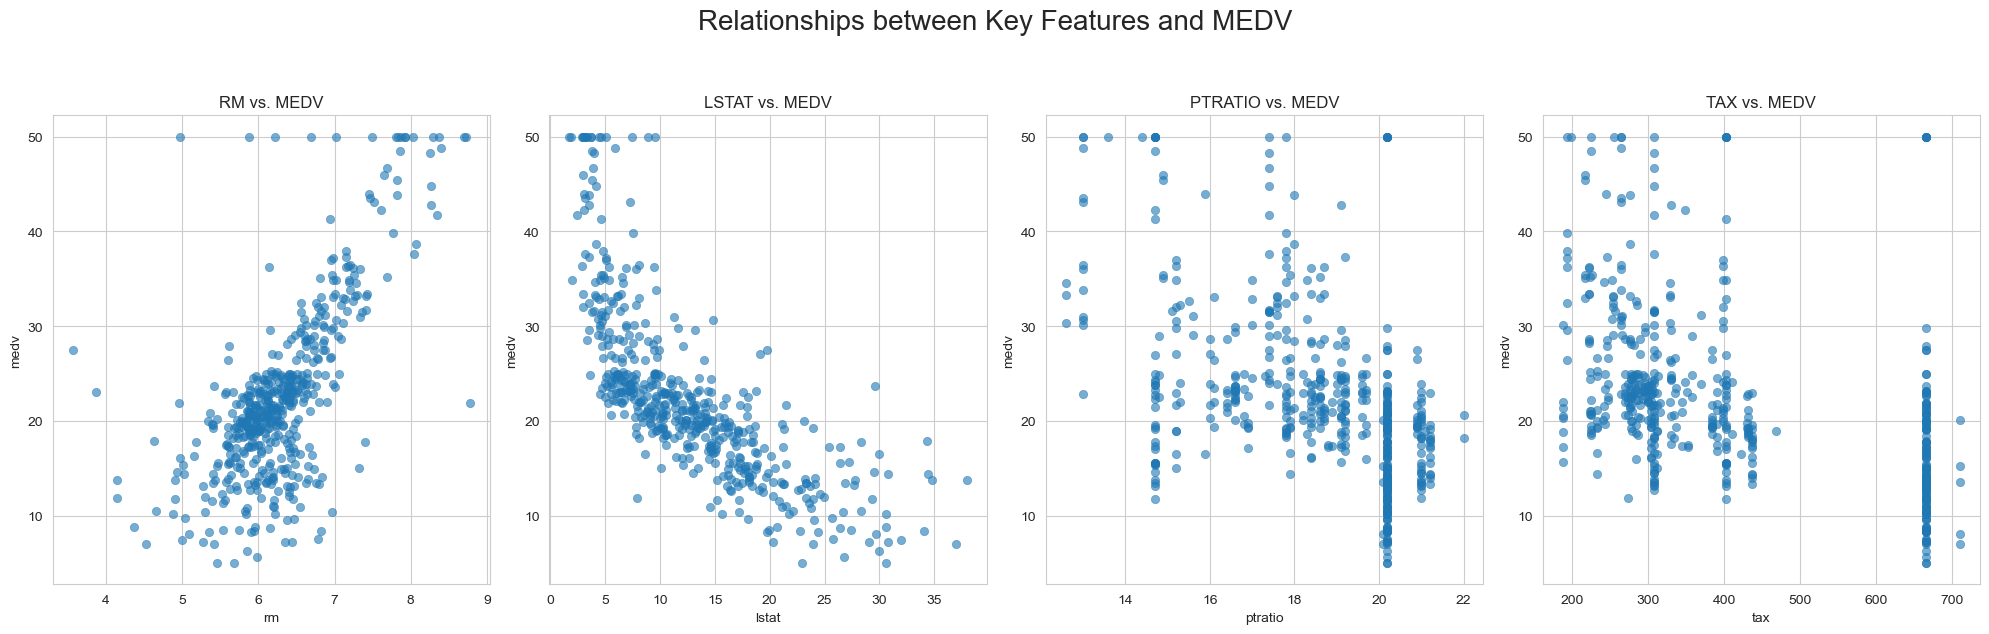

In [7]:
# Set up the aesthetics for the plots
sns.set_style("whitegrid")

# Adjusted list of features to match the dataframe's column names
features = ['rm', 'lstat', 'ptratio', 'tax']

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 6))
fig.suptitle('Relationships between Key Features and MEDV', fontsize=20, y=1.05)

# Create scatter plots in the subplot grid
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='medv', alpha=0.6, edgecolor=None, ax=axes[i])
    axes[i].set_title(f'{feature.upper()} vs. MEDV')

plt.tight_layout()
plt.show()


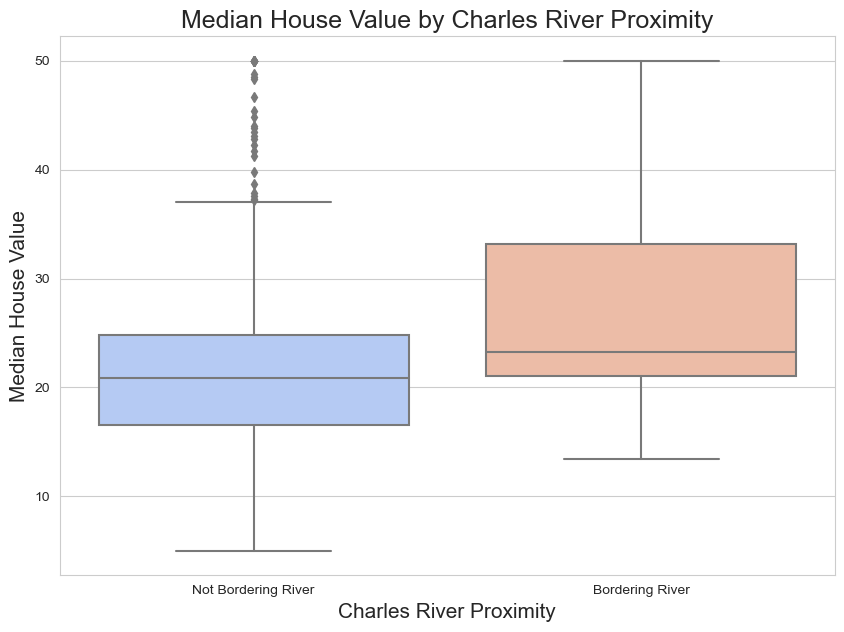

In [8]:
# Create a boxplot for MEDV based on CHAS categories
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='chas', y='medv', palette="coolwarm")
plt.title('Median House Value by Charles River Proximity', fontsize=18)
plt.xticks(ticks=[0, 1], labels=['Not Bordering River', 'Bordering River'])
plt.xlabel('Charles River Proximity', fontsize=15)
plt.ylabel('Median House Value', fontsize=15)
plt.show()


In [9]:
# Calculate Q1, Q3, and IQR for the 'medv' feature
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
df_no_outliers = df[(df['medv'] >= lower_bound) & (df['medv'] <= upper_bound)]

# Display the shape of the original and new dataframes to see how many rows were excluded
original_shape = df.shape
new_shape = df_no_outliers.shape

original_shape, new_shape


((506, 14), (466, 14))

In [10]:
# Df no outliners
df_no_outliers = df[(df['medv'] >= lower_bound) & (df['medv'] <= upper_bound)].copy()


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()

# Exclude the target variable 'medv' from scaling
features_to_scale = df_no_outliers.drop(columns=['medv']).columns

# Scale the features using .loc 
df_no_outliers.loc[:, features_to_scale] = scaler.fit_transform(df_no_outliers[features_to_scale])

# Display the first few rows of the scaled dataframe
df_no_outliers.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.435149,0.334919,-1.336816,-0.252838,-0.160527,0.686751,-0.123732,0.120801,-0.987089,-0.695549,-1.609553,0.451503,-1.197647,24.0
1,-0.432601,-0.477604,-0.635435,-0.252838,-0.748894,0.419254,0.365267,0.534016,-0.873232,-1.016283,-0.396584,0.451503,-0.597069,21.6
2,-0.432603,-0.477604,-0.635435,-0.252838,-0.748894,1.746319,-0.270075,0.534016,-0.873232,-1.016283,-0.396584,0.408469,-1.334799,34.7
3,-0.431986,-0.477604,-1.355972,-0.252838,-0.842692,1.421500,-0.816183,1.049935,-0.759375,-1.135074,0.040085,0.427501,-1.492162,33.4
4,-0.427533,-0.477604,-1.355972,-0.252838,-0.842692,1.680313,-0.516359,1.049935,-0.759375,-1.135074,0.040085,0.451503,-1.147118,36.2


In [12]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df_no_outliers.drop(columns=['medv'])
y = df_no_outliers['medv']

# Splitting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((372, 13), (94, 13), (372,), (94,))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate and print the Mean Squared Error and the R^2 value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(9.929286962391721, 0.7524822826379569)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# n_estimators is the number of trees in the forest
# random_state ensures reproducibility of results
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Calculate and print the Mean Squared Error and the R^2 value for the Random Forest model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

rf_mse, rf_r2


(5.935272585106397, 0.8520452548353803)

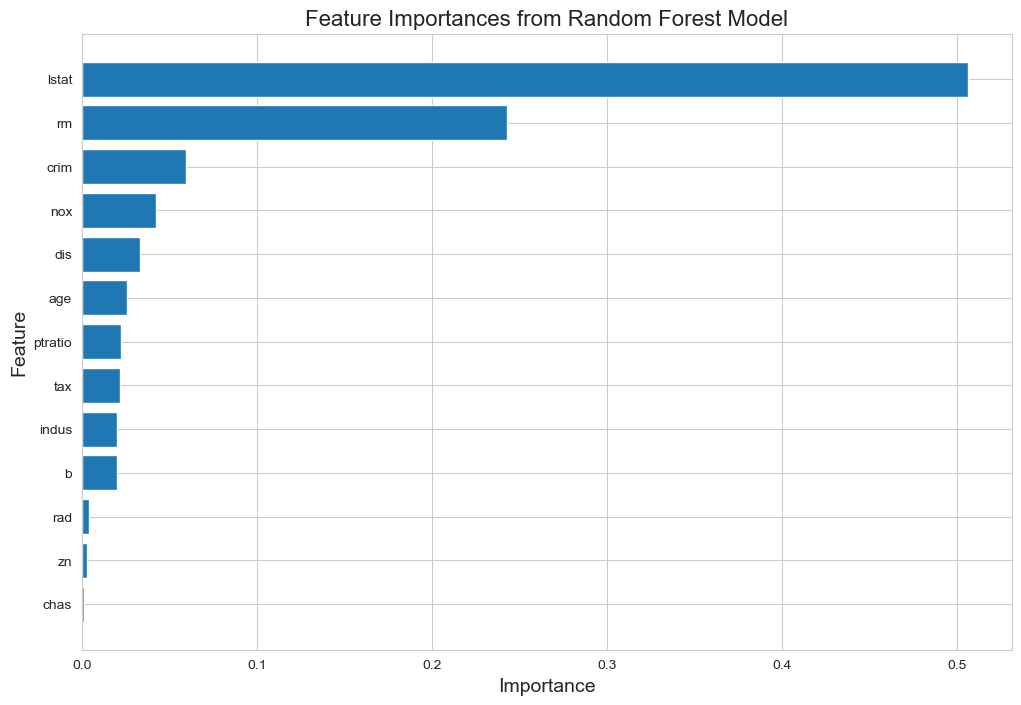

In [15]:
# Extract feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Pair feature names with their importance scores
features_list = list(X_train.columns)
feature_pairs = sorted(zip(features_list, feature_importances), key=lambda x: x[1], reverse=True)

# Separate the feature names and scores into separate lists
features, importances = zip(*feature_pairs)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(features, importances, align='center')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances from Random Forest Model', fontsize=16)
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


In [20]:
# XGBoost (eXtreme Gradient Boosting) is an optimized distributed gradient boosting library. 

# Note: The following cell installs the XGBoost package, which is necessary for some of the models in this notebook.
#  If you've already installed this package, you can skip or comment out the next cell.



In [21]:
# pip install xgboost 

In [19]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_xgb_pred = xgb_model.predict(X_test)

# Calculate and print the Mean Squared Error and the R^2 value for the XGBoost model
xgb_mse = mean_squared_error(y_test, y_xgb_pred)
xgb_r2 = r2_score(y_test, y_xgb_pred)

xgb_mse, xgb_r2


(7.084085117657808, 0.8234076037320286)